<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [18]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

In [19]:
df=pd.read_csv("data/job_listings.csv")

In [20]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [21]:
X=df.description
X

0      b"<div><div>Job Requirements:</div><ul><li><p>...
1      b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2      b'<div><p>As a Data Scientist you will be work...
3      b'<div class="jobsearch-JobMetadataHeader icl-...
4      b'<ul><li>Location: USA \xe2\x80\x93 multiple ...
5      b'<div>Create various Business Intelligence An...
6      b'<div><p>As Spotify Premium swells to over 96...
7      b"Everytown for Gun Safety, the nation's large...
8      b"<ul><li>MS in a quantitative discipline such...
9      b'<div><p>Slack is hiring experienced data sci...
10     b'<div><p><b>Who We Are</b></p><p>\nBlackThorn...
11     b'<div class="jobsearch-JobMetadataHeader icl-...
12     b"nfosys\xe2\x80\x93 Data &amp; Analytics \xe2...
13     b'<div><p>As Spotify Premium swells to over 96...
14     b'<div><ul><li>Experience with guiding R&amp;D...
15     b'<div><p>The Atlantic is seeking a Data Scien...
16     b'<div><p><b>THE CHALLENGE</b></p><p>\nEventbr...
17     b'<div class="jobsearch-

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [104]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df['description_clean']=[BeautifulSoup(X).getText() for X in df['description']]
df['description_clean']

0      b"Job Requirements:\nConceptual understanding ...
1      b'Job Description\n\nAs a Data Scientist 1, yo...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
5      b'Create various Business Intelligence Analyti...
6      b'As Spotify Premium swells to over 96M subscr...
7      b"Everytown for Gun Safety, the nation's large...
8      b"MS in a quantitative discipline such as Stat...
9      b'Slack is hiring experienced data scientists ...
10     b'Who We Are\nBlackThorn Therapeutics is a com...
11     b'Part-timeAbout The Opportunity\nHere at Grub...
12     b"nfosys\xe2\x80\x93 Data & Analytics \xe2\x80...
13     b'As Spotify Premium swells to over 96M subscr...
14     b'Experience with guiding R&D strategy for you...
15     b'The Atlantic is seeking a Data Scientist to ...
16     b'THE CHALLENGE\nEventbrite is big, bustling m...
17     b'ContractWe are looking

In [105]:
df['description_clean'] = df['description_clean'].apply(lambda x: x[2:-1].replace('\\n', ' '))

In [106]:
df['description_clean']

0      Job Requirements: Conceptual understanding in ...
1      Job Description  As a Data Scientist 1, you wi...
2      As a Data Scientist you will be working on con...
3      $4,969 - $6,756 a monthContractUnder the gener...
4      Location: USA \xe2\x80\x93 multiple locations ...
5      Create various Business Intelligence Analytica...
6      As Spotify Premium swells to over 96M subscrib...
7      Everytown for Gun Safety, the nation's largest...
8      MS in a quantitative discipline such as Statis...
9      Slack is hiring experienced data scientists to...
10     Who We Are BlackThorn Therapeutics is a comput...
11     Part-timeAbout The Opportunity Here at Grubhub...
12     nfosys\xe2\x80\x93 Data & Analytics \xe2\x80\x...
13     As Spotify Premium swells to over 96M subscrib...
14     Experience with guiding R&D strategy for your ...
15     The Atlantic is seeking a Data Scientist to he...
16     THE CHALLENGE Eventbrite is big, bustling mark...
17     ContractWe are looking t

## 2) Use Spacy to tokenize the listings 

In [107]:
##### Your Code Here #####
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [108]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['description_clean'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [109]:
df.tokens.head()

0    [job, requirements:, conceptual, understanding...
1    [job, description,  , data, scientist, 1,, hel...
2    [data, scientist, working, consulting, busines...
3    [$4,969, $6,756, monthcontractunder, general, ...
4    [location:, usa, \xe2\x80\x93, multiple, locat...
Name: tokens, dtype: object

In [110]:
df['tokens']=df['tokens'].astype(str)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [111]:
##### Your Code Here #####




vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(df.tokens)

# Get sparse dtm
dtm = vect.transform(df.tokens)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())


dtm


,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,3,0,1,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
9,0,0,1,0,0,1,2,0,0,1,...,0,0,0,0,0,4,0,0,1,0


## 4) Visualize the most common word counts

In [112]:
##### Your Code Here #####
bag_of_words=vect.transform(df.tokens)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
word_freq_10=words_freq[:10]
word_freq_10

[('data', 4466),
 ('experience', 1854),
 ('xe2', 1417),
 ('x80', 1404),
 ('business', 1212),
 ('work', 1161),
 ('team', 988),
 ('science', 958),
 ('learning', 919),
 ('analytics', 736)]

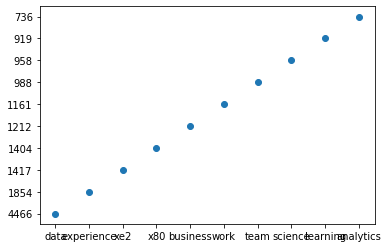

In [113]:
data = np.array(word_freq_10)
x, y = data.T
plt.scatter(x,y)
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [114]:
##### Your Code Here #####
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df.description_clean) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()
                

,,,1,2,3,4,5,6,\xc2\xbb,\xef\x83\x98,...,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re data,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.066967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.061634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [115]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [116]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.30621878, 1.32166127, 1.32826173, 1.33186607]]),
 array([[  0, 115, 274, 336, 338]]))

In [118]:
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 1.25648689, 1.26528823, 1.27893791, 1.28110997]]),
 array([[256, 201, 410, 199, 399]]))

In [119]:
rndm_tech_article = ["""Data Science, Data Mining, Data Analysis, Python, Machine Learning"""]

In [120]:
new = tfidf.transform(rndm_tech_article)

In [121]:
nn.kneighbors(new.todense())

(array([[1.33153404, 1.33723134, 1.34215306, 1.34286151, 1.34471793]]),
 array([[168, 145, 383, 185,  38]]))

In [123]:
df['description_clean'][168]

"Logistics done differently. At XPO Logistics, we invest over $450 million in technology every year so that we can continue to develop state-of-the-art solutions for our customers. As the Data Scientist, you will be responsible for developing analytical experiments in a methodical manner and regularly evaluating alternate models to support strategic initiatives and ongoing business processes. You will work with leads, analysts and data producers/consumers to understand requirements, develop technical solutions and ensure the reliability and performance of the data solutions. Become a part of our growing, dynamic team and we'll help you build a career you can be proud of. Pay, benefits and more. We are eager to attract the best, so we offer competitive compensation and a generous benefits package, including full health insurance (medical, dental and vision), 401(k), life insurance, disability and the opportunity to participate in a company incentive plan. What you\\xe2\\x80\\x99ll do on

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 